Práctica 4: Resolviendo el Problema XOR utilizando un Perceptrón Multicapa
Redes Neuronales y Aprendizaje Profundo
Rodrigo F. Román Godínez
Flores Lara Alberto
5BV1

Objetivo:
En esta práctica, implementarás una red neuronal de función de base radial (RBF) para
resolver problemas de clasificación. El objetivo es entender el funcionamiento de las
neuronas RBF y aplicar dos métodos: uno con parámetros manuales y otro con
entrenamiento utilizando descenso de gradiente.
Parte 1: Implementación Manual de una Red RBF
Instrucciones:
1. Define la estructura de una red RBF:
* Programa una red RBF con la capacidad de asignar manualmente:
* Centroides de las funciones gausianas.
* Radio (sigma) de las funciones gausianas.
* Pesos y bias de la capa perceptrón.
2. Grafica la frontera de decisión:
* Usando los parámetros definidos manualmente, grafica la frontera de
decisión de tu red para visualizar cómo clasifica los datos.

Tips:
* Recuerda que la salida de una neurona RBF se obtiene a través de una función
gaussiana.
* La frontera de decisión se puede graficar creando una malla de puntos y calculando
la salida de la red para cada punto.

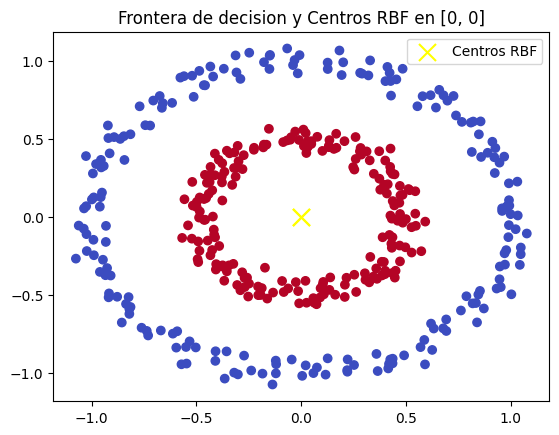

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Funcion para generar datos en dos anillos concentricos
def generar_datos_circulares(radio1, radio2, puntos_por_anillo, ruido):
    angulos = np.linspace(0, 2 * np.pi, puntos_por_anillo)
    
    #Anillo 1
    x1 = radio1 * np.cos(angulos) + ruido * np.random.randn(puntos_por_anillo)
    y1 = radio1 * np.sin(angulos) + ruido * np.random.randn(puntos_por_anillo)
    datos1 = np.vstack((x1, y1)).T
    etiquetas1 = np.zeros(puntos_por_anillo)  # Clase 0

    #Anillo 2
    x2 = radio2 * np.cos(angulos) + ruido * np.random.randn(puntos_por_anillo)
    y2 = radio2 * np.sin(angulos) + ruido * np.random.randn(puntos_por_anillo)
    datos2 = np.vstack((x2, y2)).T
    etiquetas2 = np.ones(puntos_por_anillo)  # Clase 1

    datos = np.vstack((datos1, datos2))
    etiquetas = np.hstack((etiquetas1, etiquetas2))
    
    return datos, etiquetas

# Generamos los datos
datos, etiquetas = generar_datos_circulares(radio1=0.5, radio2=1, puntos_por_anillo=200, ruido=0.05)

# Definicion manual de los centros RBF
centros_manuales = np.array([
    [0.0, 0.0],  # Centro en (0, 0) para el Anillo interno
    [0.0, 0.0],  # Centro en (0, 0) para el Anillo externo
])

# Radio (sigma) manual para los dos anillos
sigma = 0.5

# Funcion radial gaussiana
def funcion_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

# Perceptron
# Pesos y sesgo manuales
pesos_manuales = np.array([1, 1])
sesgo_manual = -0.2

# Prediccion usando la red RBF manual
def predecir_rbf(X, centros, sigma, pesos, sesgo):
    salidas_rbf = np.array([[funcion_rbf(x, c, sigma) for c in centros] for x in X])
    salida = salidas_rbf.dot(pesos) + sesgo
    return np.round(salida).astype(int)  # Clasificacion binaria

# Predicciones
predicciones = predecir_rbf(datos, centros_manuales, sigma, pesos_manuales, sesgo_manual)

# Visualizacion de la frontera de decision
def mostrar_frontera_decision(datos, predicciones, centros):
    plt.scatter(datos[:, 0], datos[:, 1], c=predicciones, cmap='coolwarm')
    plt.scatter(centros[:, 0], centros[:, 1], s=150, c='yellow', marker='x', label="Centros RBF")
    plt.title("Frontera de decision y Centros RBF en [0, 0]")
    plt.legend()
    plt.show()

# Visualizacion de la frontera de decision
mostrar_frontera_decision(datos, predicciones, centros_manuales)



Parte 2: Entrenamiento Automático con Descenso de Gradiente
Instrucciones:
1. Modifica la red RBF:
* En lugar de definir manualmente los parámetros de las neuronas RBF, genera
los centroides y radios automáticamente según la cantidad de neuronas
que determines.
2. Entrenamiento del perceptrón:
* Implementa un perceptrón que se entrene utilizando descenso de
gradiente. Ajusta los pesos y bias en función de los errores que cometa la
red.
* Utiliza una función de pérdida, como el error cuadrático medio (MSE), para
calcular los errores en cada iteración.
* Realiza varias épocas de entrenamiento para mejorar el rendimiento del
modelo.
3. Grafica los resultados:
* Al igual que en la Parte 1, grafica la frontera de decisión después de entrenar
el perceptrón.
Tips:
* Para el descenso de gradiente, asegúrate de actualizar los pesos y el bias de
acuerdo con la derivada de la función de pérdida.
* Usa una tasa de aprendizaje pequeña para que el entrenamiento sea estable

c:\Users\albsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Epoca 1/100, Pérdida: 0.56
Epoca 2/100, Pérdida: 0.5
Epoca 3/100, Pérdida: 0.5
Epoca 4/100, Pérdida: 0.5
Epoca 5/100, Pérdida: 0.5
Epoca 6/100, Pérdida: 0.5
Epoca 7/100, Pérdida: 0.5
Epoca 8/100, Pérdida: 0.5
Epoca 9/100, Pérdida: 0.5
Epoca 10/100, Pérdida: 0.5
Epoca 11/100, Pérdida: 0.5
Epoca 12/100, Pérdida: 0.5
Epoca 13/100, Pérdida: 0.5
Epoca 14/100, Pérdida: 0.5
Epoca 15/100, Pérdida: 0.5
Epoca 16/100, Pérdida: 0.5
Epoca 17/100, Pérdida: 0.495
Epoca 18/100, Pérdida: 0.47
Epoca 19/100, Pérdida: 0.395
Epoca 20/100, Pérdida: 0.315
Epoca 21/100, Pérdida: 0.23
Epoca 22/100, Pérdida: 0.15
Epoca 23/100, Pérdida: 0.1175
Epoca 24/100, Pérdida: 0.08
Epoca 25/100, Pérdida: 0.0475
Epoca 26/100, Pérdida: 0.0225
Epoca 27/100, Pérdida: 0.0175
Epoca 28/100, Pérdida: 0.01
Epoca 29/100, Pérdida: 0.01
Epoca 30/100, Pérdida: 0.0075
Epoca 31/100, Pérdida: 0.0075
Epoca 32/100, Pérdida: 0.0025
Epoca 33/100, Pérdida: 0.0
Epoca 34/100, Pérdida: 0.0
Epoca 35/100, Pérdida: 0.0
Epoca 36/100, Pérdida: 0.0
Epo

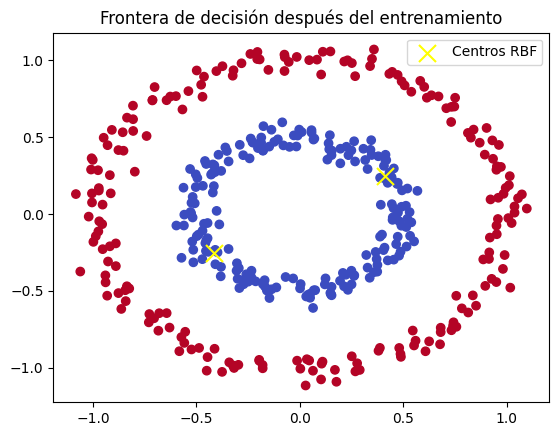

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Función para generar datos en dos anillos concéntricos (mantenemos la misma que en la parte 1)
def generar_datos_circulares(radio1, radio2, puntos_por_anillo, ruido):
    angulos = np.linspace(0, 2 * np.pi, puntos_por_anillo)
    
    # Anillo 1
    x1 = radio1 * np.cos(angulos) + ruido * np.random.randn(puntos_por_anillo)
    y1 = radio1 * np.sin(angulos) + ruido * np.random.randn(puntos_por_anillo)
    datos1 = np.vstack((x1, y1)).T
    etiquetas1 = np.zeros(puntos_por_anillo)  # Clase 0

    # Anillo 2
    x2 = radio2 * np.cos(angulos) + ruido * np.random.randn(puntos_por_anillo)
    y2 = radio2 * np.sin(angulos) + ruido * np.random.randn(puntos_por_anillo)
    datos2 = np.vstack((x2, y2)).T
    etiquetas2 = np.ones(puntos_por_anillo)  # Clase 1

    datos = np.vstack((datos1, datos2))
    etiquetas = np.hstack((etiquetas1, etiquetas2))
    
    return datos, etiquetas

# Función radial gaussiana
def funcion_rbf(x, c, sigma):
    return np.exp(-np.linalg.norm(x - c)**2 / (2 * sigma**2))

# Función de pérdida (Error cuadrático medio)
def perdida_mse(y_real, y_predicho):
    return np.mean((y_real - y_predicho) ** 2)

# Predicción usando la red RBF
def predecir_rbf(X, centros, sigma, pesos, sesgo):
    salidas_rbf = np.array([[funcion_rbf(x, c, sigma) for c in centros] for x in X])
    salida = salidas_rbf.dot(pesos) + sesgo
    return np.round(salida).astype(int)  # Clasificación binaria

# Entrenamiento del perceptrón usando descenso de gradiente
def entrenar_perceptron(X, y, centros, sigma, tasa_aprendizaje=0.01, epocas=100):
    num_muestras, num_caracteristicas = X.shape
    num_centros = centros.shape[0]
    
    # Inicializamos los pesos y sesgo de forma aleatoria
    pesos = np.random.randn(num_centros)
    sesgo = np.random.randn()
    
    # Para cada época
    for epoca in range(epocas):
        for i in range(num_muestras):
            # Calculamos la salida del RBF
            salidas_rbf = np.array([funcion_rbf(X[i], c, sigma) for c in centros])
            salida = salidas_rbf.dot(pesos) + sesgo
            
            # Cálculo del error
            error = y[i] - salida
            
            # Actualizamos los pesos y el sesgo (descenso de gradiente)
            pesos += tasa_aprendizaje * error * salidas_rbf
            sesgo += tasa_aprendizaje * error
            
        # Calculamos el MSE al final de cada época
        predicciones = predecir_rbf(X, centros, sigma, pesos, sesgo)
        perdida = perdida_mse(y, predicciones)
        print(f"Epoca {epoca+1}/{epocas}, Pérdida: {perdida}")
    
    return pesos, sesgo

# Generamos los datos
datos, etiquetas = generar_datos_circulares(radio1=0.5, radio2=1, puntos_por_anillo=200, ruido=0.05)

# Usamos K-Means para encontrar los centros RBF automáticamente
kmeans = KMeans(n_clusters=2, random_state=0).fit(datos)
centros = kmeans.cluster_centers_

# Calculamos el radio (sigma) como la distancia promedio entre los puntos y los centros
distancias = np.linalg.norm(datos[:, np.newaxis] - centros, axis=2)
sigma = np.mean(distancias)

# Entrenamos el perceptrón con descenso de gradiente
pesos, sesgo = entrenar_perceptron(datos, etiquetas, centros, sigma, tasa_aprendizaje=0.01, epocas=100)

# Realizamos las predicciones finales
predicciones = predecir_rbf(datos, centros, sigma, pesos, sesgo)

# Función para la visualización de la frontera de decisión
def mostrar_frontera_decision(datos, predicciones, centros):
    plt.scatter(datos[:, 0], datos[:, 1], c=predicciones, cmap='coolwarm')
    plt.scatter(centros[:, 0], centros[:, 1], s=150, c='yellow', marker='x', label="Centros RBF")
    plt.title("Frontera de decisión después del entrenamiento")
    plt.legend()
    plt.show()

# Visualización de la frontera de decisión
mostrar_frontera_decision(datos, predicciones, centros)
